<a href="https://colab.research.google.com/github/Dogdriip/dg-univ-2020-ml/blob/main/v1_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# v1.2.4


In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 
import warnings
warnings.filterwarnings(action='ignore')

!pip install missingpy
from missingpy import MissForest

from scipy import stats
from scipy.stats import norm, skew #for some statistics

!pip install pycaret  # AutoML

In [ ]:
train = pd.read_csv('/content/drive/My Drive/dg_univ_2020_ml/train.csv')
test = pd.read_csv('/content/drive/My Drive/dg_univ_2020_ml/test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(11769, 15)
(5789, 13)


In [ ]:
train.head()

,no,모델명,연월,연식,연료,주행거리,인승,최대출력(마력),기통,최대토크(kgm),구동방식,자동수동,국산/수입,신차가(만원),가격(만원)
0,0,기아 더 뉴 K7 2.4 GDI 프레스티지 스페셜,12/12(13년형),2013.0,가솔린,4만km,NaN,201.0,4.0,25.5,FF,NaN,국산,3141.0,1870.0
1,1,현대 YF쏘나타 2.0 Y20 LPi 프리미어,10/03,2010.0,LPG,9만km,NaN,157.0,NaN,20.0,FF,NaN,국산,NaN,700.0
2,2,현대 그랜져HG 220 디젤 프리미엄,14/09(15년형),2015.0,디젤,3만km,NaN,202.0,4.0,45.0,FF,NaN,국산,3389.0,2990.0
3,3,쌍용 뉴카이런 2.0 LV5 2WD 고급형,07/06(08년형),2008.0,디젤,16만km,NaN,151.0,4.0,33.8,FR,NaN,국산,2499.0,420.0
4,4,현대 뉴스타렉스 점보 밴 TCI 3인승 GX 윈도우밴 일반형,04/03,2004.0,디젤,16만km,3.0,103.0,NaN,24.0,FR,수동,국산,1445.0,450.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         11769 non-null  int64  
 1   모델명        11769 non-null  object 
 2   연월         11769 non-null  object 
 3   연식         11769 non-null  float64
 4   연료         11769 non-null  object 
 5   주행거리       11769 non-null  object 
 6   인승         765 non-null    float64
 7   최대출력(마력)   10644 non-null  float64
 8   기통         8698 non-null   float64
 9   최대토크(kgm)  10545 non-null  float64
 10  구동방식       10808 non-null  object 
 11  자동수동       1313 non-null   object 
 12  국산/수입      11769 non-null  object 
 13  신차가(만원)    9544 non-null   float64
 14  가격(만원)     11769 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         5789 non-null   int64  
 1   모델명        5789 non-null   object 
 2   연월         5789 non-null   object 
 3   연식         5789 non-null   float64
 4   연료         5789 non-null   object 
 5   주행거리       5789 non-null   object 
 6   인승         389 non-null    float64
 7   최대출력(마력)   5237 non-null   float64
 8   기통         4275 non-null   float64
 9   최대토크(kgm)  5183 non-null   float64
 10  구동방식       5312 non-null   object 
 11  자동수동       665 non-null    object 
 12  국산/수입      5789 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 588.1+ KB


# Translate all column name to English

In [ ]:
train.columns = ['no', 'modelname', 'ym', 'yeartype', 'fuel', 'dist', 'people', 'power', 'cylinder', 'torque', 'type', 'mission', 'country', 'newprice', 'price']
test.columns = ['no', 'modelname', 'ym', 'yeartype', 'fuel', 'dist', 'people', 'power', 'cylinder', 'torque', 'type', 'mission', 'country']

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         11769 non-null  int64  
 1   modelname  11769 non-null  object 
 2   ym         11769 non-null  object 
 3   yeartype   11769 non-null  float64
 4   fuel       11769 non-null  object 
 5   dist       11769 non-null  object 
 6   people     765 non-null    float64
 7   power      10644 non-null  float64
 8   cylinder   8698 non-null   float64
 9   torque     10545 non-null  float64
 10  type       10808 non-null  object 
 11  mission    1313 non-null   object 
 12  country    11769 non-null  object 
 13  newprice   9544 non-null   float64
 14  price      11769 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         5789 non-null   int64  
 1   modelname  5789 non-null   object 
 2   ym         5789 non-null   object 
 3   yeartype   5789 non-null   float64
 4   fuel       5789 non-null   object 
 5   dist       5789 non-null   object 
 6   people     389 non-null    float64
 7   power      5237 non-null   float64
 8   cylinder   4275 non-null   float64
 9   torque     5183 non-null   float64
 10  type       5312 non-null   object 
 11  mission    665 non-null    object 
 12  country    5789 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 588.1+ KB


In [ ]:
# sns.heatmap(train.isnull(), cbar=False)

In [ ]:
# sns.heatmap(test.isnull(), cbar=False)

In [ ]:
train_no = train['no']
test_no = test['no']
train = train.drop(['no'], axis=1)
test = test.drop(['no'], axis=1)

# Getting started (All columns here)
```
0   no         11769 non-null  int64    
1   모델명        11769 non-null  object   
2   연월         11769 non-null  object   
3   연식         11769 non-null  float64  
4   연료         11769 non-null  object   
5   주행거리       11769 non-null  object   
6   인승         765 non-null    float64  
7   최대출력(마력)   10644 non-null  float64  
8   기통         8698 non-null   float64  
9   최대토크(kgm)  10545 non-null  float64  
10  구동방식       10808 non-null  object   
11  자동수동       1313 non-null   object   
12  국산/수입      11769 non-null  object   
13  신차가(만원)    9544 non-null   float64  
14  가격(만원)     11769 non-null  float64  
```

```
0   no         11769 non-null  int64  
1   modelname  11769 non-null  object 
2   ym         11769 non-null  object 
3   yeartype   11769 non-null  float64
4   fuel       11769 non-null  object 
5   dist       11769 non-null  object 
6   people     765 non-null    float64
7   power      10644 non-null  float64
8   cylinder   8698 non-null   float64
9   torque     10545 non-null  float64
10  type       10808 non-null  object 
11  mission    1313 non-null   object 
12  country    11769 non-null  object 
13  newprice   9544 non-null   float64
14  price      11769 non-null  float64
```

# Outlier check, remove

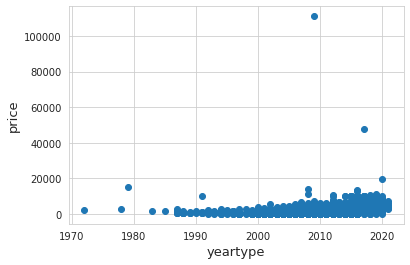

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=train['yeartype'], y=train['price'])
plt.xlabel('yeartype', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.show()

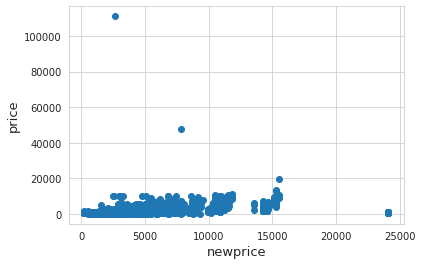

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=train['newprice'], y=train['price'])
plt.xlabel('newprice', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.show()

In [ ]:
train = train.drop(train[(train['price'] > 40000)].index)

In [ ]:
train[(train['price'] > 40000)]

,modelname,ym,yeartype,fuel,dist,people,power,cylinder,torque,type,mission,country,newprice,price


# More inspection at price (apply log1p)


 mu = 1459.69 and sigma = 1374.79



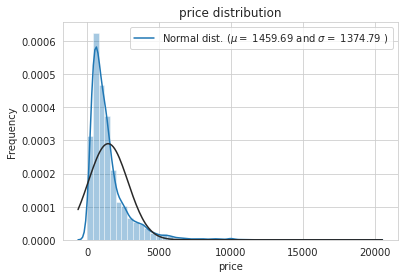

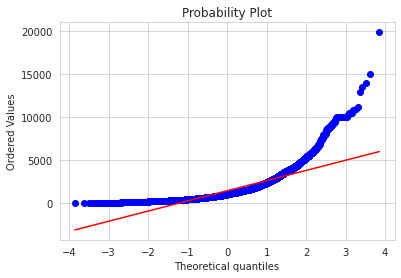

In [ ]:
sns.distplot(train['price'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

In [ ]:
train["price"] = np.log1p(train["price"])


 mu = 6.94 and sigma = 0.88



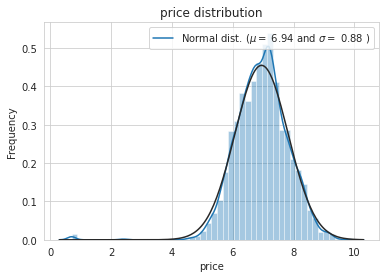

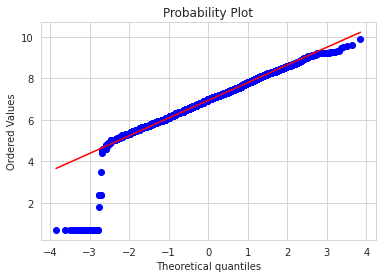

In [ ]:
sns.distplot(train['price'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

# Correlation Matrix

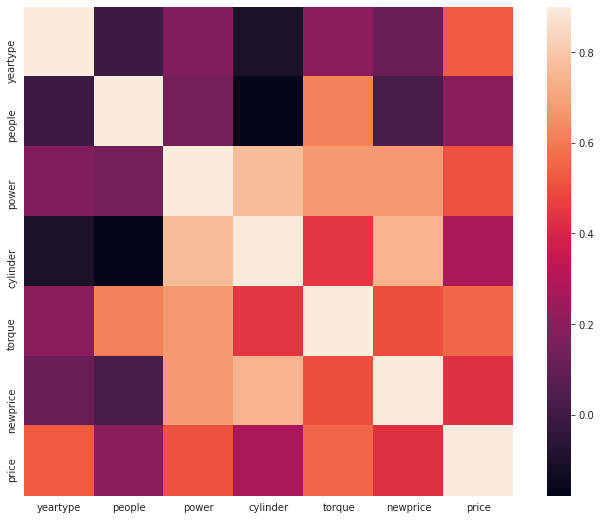

In [ ]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# 1 모델명 modelname 11769 non-null object

- 역시 이번에도 모델명은 날리자

In [ ]:
train = train.drop(['modelname'], axis=1)
test = test.drop(['modelname'], axis=1)

print(train.shape)
print(test.shape)

(11767, 13)
(5789, 11)


# 2 연월 ym 11769 non-null object

- 생각해보면, 그리고 데이터 명세 다시 보니까,
- 어차피 연식(yeartype)에 있는 정보다
- 이거 날리자

In [ ]:
train = train.drop(['ym'], axis=1)
test = test.drop(['ym'], axis=1)

print(train.shape)
print(test.shape)

(11767, 12)
(5789, 10)


# 3 연식 yeartype 11769 non-null float64

건들지 말자

# 4 연료 fuel 11769 non-null object

- 범주형
- 이거 생각 좀 해보자
- 그냥 큰 범주로 산입할까?

In [ ]:
train_fuel = train['fuel']
test_fuel = test['fuel']

In [ ]:
print(train_fuel.value_counts())
print()
print(test_fuel.value_counts())

가솔린          6669
디젤           3967
LPG           934
가솔린+전기         79
가솔린/LPG겸용      41
기타             32
전기             24
LPG+전기         14
가솔린/CNG겸용       4
CNG             2
수소              1
Name: fuel, dtype: int64

가솔린          3280
디젤           1932
LPG           469
가솔린+전기         34
가솔린/LPG겸용      33
전기             19
기타             11
LPG+전기          8
CNG             2
가솔린/CNG겸용       1
Name: fuel, dtype: int64


## 산입

- 일단 그냥 수소만 기타로 갖다박을까?



In [ ]:
train_fuel = train_fuel.replace('수소', '기타')

In [ ]:
train_fuel.value_counts()

가솔린          6669
디젤           3967
LPG           934
가솔린+전기         79
가솔린/LPG겸용      41
기타             33
전기             24
LPG+전기         14
가솔린/CNG겸용       4
CNG             2
Name: fuel, dtype: int64

In [ ]:
train_fuel_dummies = pd.get_dummies(train_fuel)
test_fuel_dummies = pd.get_dummies(test_fuel)

train_fuel_dummies = train_fuel_dummies.add_prefix('fuel_')
test_fuel_dummies = test_fuel_dummies.add_prefix('fuel_')

train = train.join(train_fuel_dummies)
test = test.join(test_fuel_dummies)

train = train.drop(['fuel'], axis=1)
test = test.drop(['fuel'], axis=1)

## train = train.join(train_fuel)
## test = test.join(test_fuel)

In [ ]:
train.head()

,yeartype,dist,people,power,cylinder,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기
0,2013.0,4만km,NaN,201.0,4.0,25.5,FF,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0
1,2010.0,9만km,NaN,157.0,NaN,20.0,FF,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0
2,2015.0,3만km,NaN,202.0,4.0,45.0,FF,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0
3,2008.0,16만km,NaN,151.0,4.0,33.8,FR,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0
4,2004.0,16만km,3.0,103.0,NaN,24.0,FR,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0


In [ ]:
print(train.shape)
print(test.shape)

(11767, 21)
(5789, 19)


# 5 주행거리 dist 11769 non-null object

- %d만{km|ml}
- 중간중간에 '등록'이라고 되어있는 게 있다
- 일단 결측치로 냅둘까?
- 나중에 MissForest 처리할 것이다

In [ ]:
train_dist = train['dist']
test_dist = test['dist']

train_dist

0         4만km
1         9만km
2         3만km
3        16만km
4        16만km
         ...  
11763     2천km
11765     5천km
11766    230km
11767     9천km
11768     3천km
Name: dist, Length: 11767, dtype: object

In [ ]:
def preprocess_dist(x):
    # '등록'은 나중에 평균으로 채울 거임
    if x == '등록':
        return None

    if x[-2:] == 'km':
        # kilometer
        x = x.split('km')[0]
        weight = 1
    else:
        # mile
        assert x[-2:] == 'ml'
        x = x.split('ml')[0]
        weight = 1.609344

    if x[-1] == '만':
        x = float(x.split('만')[0]) * 10000
    elif x[-1] == '천':
        x = float(x.split('천')[0]) * 1000

    return float(x * weight)

In [ ]:
train_dist = train_dist.apply(preprocess_dist)
test_dist = test_dist.apply(preprocess_dist)

train_dist

0         40000.0
1         90000.0
2         30000.0
3        160000.0
4        160000.0
           ...   
11763      2000.0
11765      5000.0
11766       230.0
11767      9000.0
11768      3000.0
Name: dist, Length: 11767, dtype: float64

In [ ]:
# 등록 처리
train_dist.isna().sum()

29

In [ ]:
train = train.drop(['dist'], axis=1)
test = test.drop(['dist'], axis=1)

train = train.join(train_dist)
test = test.join(test_dist)

In [ ]:
train.head()

,yeartype,people,power,cylinder,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist
0,2013.0,NaN,201.0,4.0,25.5,FF,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0
1,2010.0,NaN,157.0,NaN,20.0,FF,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0
2,2015.0,NaN,202.0,4.0,45.0,FF,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0
3,2008.0,NaN,151.0,4.0,33.8,FR,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0
4,2004.0,3.0,103.0,NaN,24.0,FR,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0


# 6 인승 people 765 non-null float64

- 드랍

In [ ]:
train_people = train['people']
test_people = test['people']

In [ ]:
train = train.drop(['people'], axis=1)
test = test.drop(['people'], axis=1)

# 7 최대출력(마력) power 10644 non-null float64

- 얘도 결측치들을 냅두자

In [ ]:
train_power = train['power']
test_power = test['power']

train_power

0        201.0
1        157.0
2        202.0
3        151.0
4        103.0
         ...  
11763    425.0
11765      NaN
11766    370.0
11767    425.0
11768    425.0
Name: power, Length: 11767, dtype: float64

In [ ]:
train_power.isna().sum()

1125

In [ ]:
# train_power = train_power.fillna(train_power.mean())
# test_power = test_power.fillna(test_power.mean())

# train_power.isna().sum()

In [ ]:
train = train.drop(['power'], axis=1)
test = test.drop(['power'], axis=1)

train = train.join(train_power)
test = test.join(test_power)

In [ ]:
train.head()

,yeartype,cylinder,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power
0,2013.0,4.0,25.5,FF,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0
1,2010.0,NaN,20.0,FF,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0
2,2015.0,4.0,45.0,FF,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0
3,2008.0,4.0,33.8,FR,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0
4,2004.0,NaN,24.0,FR,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0


# 8 기통 cylinder 8698 non-null float64

- 범주형으로 조질 수 있겠다



In [ ]:
train_cylinder = train['cylinder']
test_cylinder = test['cylinder']

train_cylinder.value_counts()

4.0    5620
6.0    2458
3.0     402
8.0     171
5.0      45
Name: cylinder, dtype: int64

In [ ]:
test_cylinder.value_counts()

4.0    2747
6.0    1222
3.0     173
8.0      95
5.0      38
Name: cylinder, dtype: int64

In [ ]:
train_cylinder.isna().sum()

3071

In [ ]:
import random
random.seed(42)

tmp = [3.0, 4.0, 5.0, 6.0, 8.0]

for i, j in enumerate(train_cylinder):
  if not (j in tmp):
    draw = random.choices(
      population=[3.0, 4.0, 5.0, 6.0, 8.0],
      weights=[0.034157532500637265,
               0.4776106721046818,
               0.003823604384399694,
               0.2089387373608633,
               0.014529696660718837],
      k=1)
    
    train_cylinder[i] = draw[0]

for i, j in enumerate(test_cylinder):
  if not (j in tmp):
    draw = random.choices(
      population=[3.0, 4.0, 5.0, 6.0, 8.0],
      weights=[0.014699634633358823,
               0.23340980542102133,
               0.0032288214801597416,
               0.10383210128303169,
               0.008072053700399354],
      k=1)
    
    test_cylinder[i] = draw[0]

In [ ]:
train_cylinder.isna().sum()

3

In [ ]:
train_cylinder_dummies = pd.get_dummies(train_cylinder)
test_cylinder_dummies = pd.get_dummies(test_cylinder)

train_cylinder_dummies = train_cylinder_dummies.add_prefix("cylinder_")
test_cylinder_dummies = test_cylinder_dummies.add_prefix("cylinder_")

train = train.join(train_cylinder_dummies)
test = test.join(test_cylinder_dummies)

train = train.drop(['cylinder'], axis=1)
test = test.drop(['cylinder'], axis=1)

## train = train.join(train_cylinder)
## test = test.join(test_cylinder)

In [ ]:
train.head()

,yeartype,torque,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0
0,2013.0,25.5,FF,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0
1,2010.0,20.0,FF,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0
2,2015.0,45.0,FF,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0
3,2008.0,33.8,FR,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0
4,2004.0,24.0,FR,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0


# 9 최대토크(kgm) torque 10545 non-null float64

- 결측치 냅두자

In [ ]:
train_torque = train['torque']
test_torque = test['torque']

train_torque

0        25.5
1        20.0
2        45.0
3        33.8
4        24.0
         ... 
11763    53.0
11765     NaN
11766    52.0
11767    53.0
11768    53.0
Name: torque, Length: 11767, dtype: float64

In [ ]:
train_torque.isna().sum()

1224

In [ ]:
train = train.drop(['torque'], axis=1)
test = test.drop(['torque'], axis=1)

train = train.join(train_torque)
test = test.join(test_torque)

In [ ]:
train.head()

,yeartype,type,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque
0,2013.0,FF,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5
1,2010.0,FF,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0
2,2015.0,FF,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0
3,2008.0,FR,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8
4,2004.0,FR,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0,24.0


# 10 구동방식 type 10808 non-null object

- 제일 많은 걸로 결측치 채우고 dummies 만들어서 쓰자
- train에 3개 있는 RR은 데이터 자체를 없애버리자

In [ ]:
train = train.drop(train[train['type'] == 'RR'].index)

In [ ]:
train_type = train['type']
test_type = test['type']

In [ ]:
print(train_type.value_counts())
print()
print(test_type.value_counts())

FF     7333
FR     2318
4WD     688
AWD     451
MR       13
Name: type, dtype: int64

FF     3655
FR     1074
4WD     352
AWD     222
MR        9
Name: type, dtype: int64


In [ ]:
import random
random.seed(42)

tmp = ['FF', 'FR', '4WD', 'AWD', 'MR']

for i, j in enumerate(train_type):
  if not (j in tmp):
    draw = random.choices(
      population=['4WD', 'AWD', 'FF', 'FR', 'MR'],
      weights=[0.058458662588155325,
               0.03840598181663693,
               0.6230775766845101,
               0.19704307927606424,
               0.0011045968221599116],
      k=1)
    
    train_type[i] = draw[0]

for i, j in enumerate(test_type):
  if not (j in tmp):
    draw = random.choices(
      population=['4WD', 'AWD', 'FF', 'FR', 'MR'],
      weights=[0.029909083184637607,
               0.01886311496303849,
               0.31056164499957517,
               0.0912566913076727,
               0.0007647208768799389],
      k=1)
    
    test_type[i] = draw[0]

In [ ]:
train_type.isna().sum()

799

In [ ]:
train_type_dummies = pd.get_dummies(train_type)
test_type_dummies = pd.get_dummies(test_type)

train_type_dummies = train_type_dummies.add_prefix('type_')
test_type_dummies = test_type_dummies.add_prefix('type_')


train = train.join(train_type_dummies)
test = test.join(test_type_dummies)

train = train.drop(['type'], axis=1)
test = test.drop(['type'], axis=1)

## train = train.join(train_type)
## test = test.join(test_type)

In [ ]:
train.head()

,yeartype,mission,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR
0,2013.0,NaN,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0
1,2010.0,NaN,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0
2,2015.0,NaN,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0
3,2008.0,NaN,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0
4,2004.0,수동,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0,24.0,0,0,0,1,0


# 11 자동수동 mission 1313 non-null object

- 드랍하자

In [ ]:
train_mission = train['mission']
test_mission = test['mission']

In [ ]:
train_mission = train_mission.fillna('자동')
test_mission = test_mission.fillna('자동')

In [ ]:
train_mission_dummies = pd.get_dummies(train_mission)
test_mission_dummies = pd.get_dummies(test_mission)

train_mission_dummies = train_mission_dummies.add_prefix('mission_')
test_mission_dummies = test_mission_dummies.add_prefix('mission_')

train = train.drop(['mission'], axis=1)
test = test.drop(['mission'], axis=1)

train = train.join(train_mission_dummies)
test = test.join(test_mission_dummies)

In [ ]:
train.head()

,yeartype,country,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR,mission_수동,mission_자동
0,2013.0,국산,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0,0,1
1,2010.0,국산,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0,0,1
2,2015.0,국산,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0,0,1
3,2008.0,국산,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0,0,1
4,2004.0,국산,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0,24.0,0,0,0,1,0,1,0


# 12 국산/수입 country 11769 non-null object

- 단순한 범주형 같다
- 아니 근데 train이랑 test 다 국산밖에 없는데?
- 드랍하자...

In [ ]:
train = train.drop(['country'], axis=1)
test = test.drop(['country'], axis=1)

In [ ]:
train.head()

,yeartype,newprice,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR,mission_수동,mission_자동
0,2013.0,3141.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0,0,1
1,2010.0,NaN,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0,0,1
2,2015.0,3389.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0,0,1
3,2008.0,2499.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0,0,1
4,2004.0,1445.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0,24.0,0,0,0,1,0,1,0


# 13 신차가(만원) newprice 9544 non-null float64

- 일단 드랍


In [ ]:
train = train.drop(['newprice'], axis=1)

In [ ]:
train.head()

,yeartype,price,fuel_CNG,fuel_LPG,fuel_LPG+전기,fuel_가솔린,fuel_가솔린+전기,fuel_가솔린/CNG겸용,fuel_가솔린/LPG겸용,fuel_기타,fuel_디젤,fuel_전기,dist,power,cylinder_3.0,cylinder_4.0,cylinder_5.0,cylinder_6.0,cylinder_8.0,torque,type_4WD,type_AWD,type_FF,type_FR,type_MR,mission_수동,mission_자동
0,2013.0,7.534228,0,0,0,1,0,0,0,0,0,0,40000.0,201.0,0,1,0,0,0,25.5,0,0,1,0,0,0,1
1,2010.0,6.552508,0,1,0,0,0,0,0,0,0,0,90000.0,157.0,0,1,0,0,0,20.0,0,0,1,0,0,0,1
2,2015.0,8.003363,0,0,0,0,0,0,0,0,1,0,30000.0,202.0,0,1,0,0,0,45.0,0,0,1,0,0,0,1
3,2008.0,6.042633,0,0,0,0,0,0,0,0,1,0,160000.0,151.0,0,1,0,0,0,33.8,0,0,0,1,0,0,1
4,2004.0,6.111467,0,0,0,0,0,0,0,0,1,0,160000.0,103.0,1,0,0,0,0,24.0,0,0,0,1,0,1,0


# 14 가격(만원) price 11769 non-null float64

- 이건 피쳐가 아니고 정답(레이블)

# 종합

In [ ]:
print(train.shape)
print(test.shape)

(11764, 27)
(5789, 26)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11764 entries, 0 to 11768
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yeartype        11764 non-null  float64
 1   price           11764 non-null  float64
 2   fuel_CNG        11764 non-null  uint8  
 3   fuel_LPG        11764 non-null  uint8  
 4   fuel_LPG+전기     11764 non-null  uint8  
 5   fuel_가솔린        11764 non-null  uint8  
 6   fuel_가솔린+전기     11764 non-null  uint8  
 7   fuel_가솔린/CNG겸용  11764 non-null  uint8  
 8   fuel_가솔린/LPG겸용  11764 non-null  uint8  
 9   fuel_기타         11764 non-null  uint8  
 10  fuel_디젤         11764 non-null  uint8  
 11  fuel_전기         11764 non-null  uint8  
 12  dist            11735 non-null  float64
 13  power           10639 non-null  float64
 14  cylinder_3.0    11764 non-null  uint8  
 15  cylinder_4.0    11764 non-null  uint8  
 16  cylinder_5.0    11764 non-null  uint8  
 17  cylinder_6.0    11764 non-null 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yeartype        5789 non-null   float64
 1   fuel_CNG        5789 non-null   uint8  
 2   fuel_LPG        5789 non-null   uint8  
 3   fuel_LPG+전기     5789 non-null   uint8  
 4   fuel_가솔린        5789 non-null   uint8  
 5   fuel_가솔린+전기     5789 non-null   uint8  
 6   fuel_가솔린/CNG겸용  5789 non-null   uint8  
 7   fuel_가솔린/LPG겸용  5789 non-null   uint8  
 8   fuel_기타         5789 non-null   uint8  
 9   fuel_디젤         5789 non-null   uint8  
 10  fuel_전기         5789 non-null   uint8  
 11  dist            5778 non-null   float64
 12  power           5237 non-null   float64
 13  cylinder_3.0    5789 non-null   uint8  
 14  cylinder_4.0    5789 non-null   uint8  
 15  cylinder_5.0    5789 non-null   uint8  
 16  cylinder_6.0    5789 non-null   uint8  
 17  cylinder_8.0    5789 non-null   u

# 결측치 채우기 - MissForest

In [ ]:
train.columns

Index(['yeartype', 'price', 'fuel_CNG', 'fuel_LPG', 'fuel_LPG+전기', 'fuel_가솔린',
       'fuel_가솔린+전기', 'fuel_가솔린/CNG겸용', 'fuel_가솔린/LPG겸용', 'fuel_기타', 'fuel_디젤',
       'fuel_전기', 'dist', 'power', 'cylinder_3.0', 'cylinder_4.0',
       'cylinder_5.0', 'cylinder_6.0', 'cylinder_8.0', 'torque', 'type_4WD',
       'type_AWD', 'type_FF', 'type_FR', 'type_MR', 'mission_수동',
       'mission_자동'],
      dtype='object')

In [ ]:
train.isna().sum()

yeartype             0
price                0
fuel_CNG             0
fuel_LPG             0
fuel_LPG+전기          0
fuel_가솔린             0
fuel_가솔린+전기          0
fuel_가솔린/CNG겸용       0
fuel_가솔린/LPG겸용       0
fuel_기타              0
fuel_디젤              0
fuel_전기              0
dist                29
power             1125
cylinder_3.0         0
cylinder_4.0         0
cylinder_5.0         0
cylinder_6.0         0
cylinder_8.0         0
torque            1224
type_4WD             0
type_AWD             0
type_FF              0
type_FR              0
type_MR              0
mission_수동           0
mission_자동           0
dtype: int64

In [ ]:
test.isna().sum()

yeartype            0
fuel_CNG            0
fuel_LPG            0
fuel_LPG+전기         0
fuel_가솔린            0
fuel_가솔린+전기         0
fuel_가솔린/CNG겸용      0
fuel_가솔린/LPG겸용      0
fuel_기타             0
fuel_디젤             0
fuel_전기             0
dist               11
power             552
cylinder_3.0        0
cylinder_4.0        0
cylinder_5.0        0
cylinder_6.0        0
cylinder_8.0        0
torque            606
type_4WD            0
type_AWD            0
type_FF             0
type_FR             0
type_MR             0
mission_수동          0
mission_자동          0
dtype: int64

In [ ]:
train_cols = train.columns.tolist()
test_cols = test.columns.tolist()

In [ ]:
imputer = MissForest(random_state=42)

train_imputed = imputer.fit_transform(train)
test_imputed = imputer.fit_transform(test)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [ ]:
train = pd.DataFrame(train_imputed, columns=train_cols)
test = pd.DataFrame(test_imputed, columns=test_cols)

In [ ]:
print(train.isna().sum())
print(test.isna().sum())

yeartype          0
price             0
fuel_CNG          0
fuel_LPG          0
fuel_LPG+전기       0
fuel_가솔린          0
fuel_가솔린+전기       0
fuel_가솔린/CNG겸용    0
fuel_가솔린/LPG겸용    0
fuel_기타           0
fuel_디젤           0
fuel_전기           0
dist              0
power             0
cylinder_3.0      0
cylinder_4.0      0
cylinder_5.0      0
cylinder_6.0      0
cylinder_8.0      0
torque            0
type_4WD          0
type_AWD          0
type_FF           0
type_FR           0
type_MR           0
mission_수동        0
mission_자동        0
dtype: int64
yeartype          0
fuel_CNG          0
fuel_LPG          0
fuel_LPG+전기       0
fuel_가솔린          0
fuel_가솔린+전기       0
fuel_가솔린/CNG겸용    0
fuel_가솔린/LPG겸용    0
fuel_기타           0
fuel_디젤           0
fuel_전기           0
dist              0
power             0
cylinder_3.0      0
cylinder_4.0      0
cylinder_5.0      0
cylinder_6.0      0
cylinder_8.0      0
torque            0
type_4WD          0
type_AWD          0
type_FF           0
type_FR

# Skew된 Column 처리


 mu = 2011.61 and sigma = 4.32



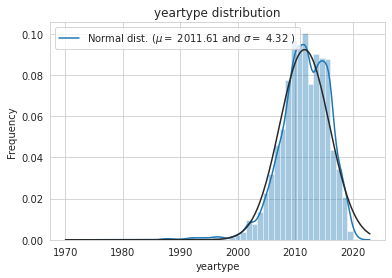

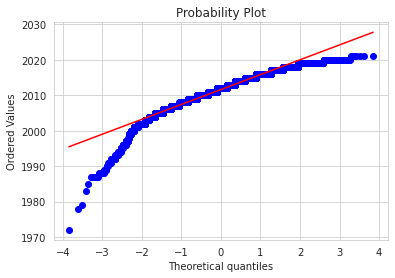


 mu = 100107.75 and sigma = 63354.15



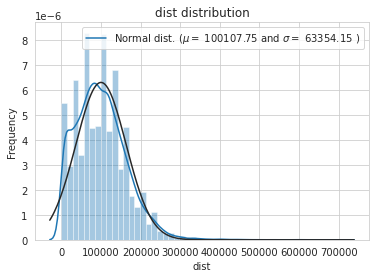

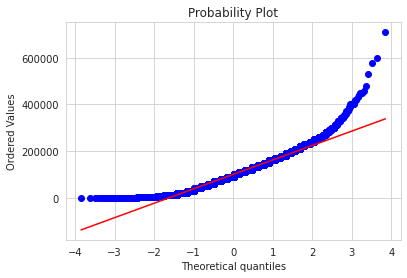


 mu = 188.37 and sigma = 68.30



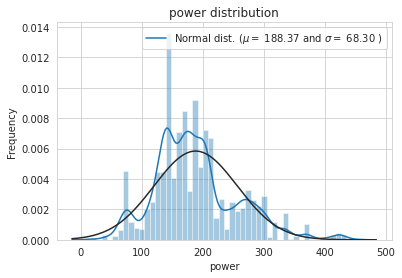

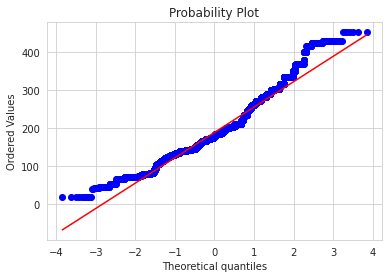


 mu = 30.07 and sigma = 11.19



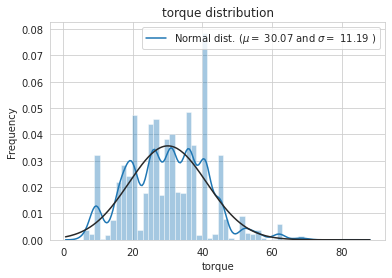

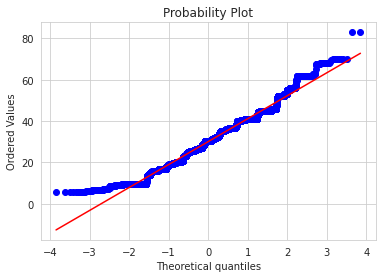

In [ ]:
numeric_feats = ['yeartype', 'dist', 'power', 'torque']
for feat in numeric_feats:
  sns.distplot(train[feat], fit=norm)

  # Get the fitted parameters used by the function
  (mu, sigma) = norm.fit(train[feat])
  print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

  #Now plot the distribution
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
              loc='best')
  plt.ylabel('Frequency')
  plt.title(f'{feat} distribution')

  #Get also the QQ-plot
  fig = plt.figure()
  res = stats.probplot(train[feat], plot=plt)
  plt.show()

## yeartype은 left-skewed, dist는 right-skewed되어 있다

## boxcox1p를 적용시켜 보자

In [ ]:
from scipy.special import boxcox1p
lam = 0.15

train['yeartype'] = boxcox1p(train['yeartype'], lam)
test['yeartype'] = boxcox1p(test['yeartype'], lam)

train['dist'] = boxcox1p(train['dist'], lam)
test['dist'] = boxcox1p(test['dist'], lam)


 mu = 14.20 and sigma = 0.01



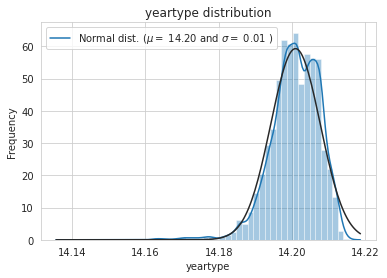

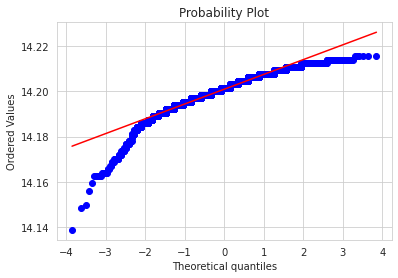


 mu = 29.43 and sigma = 4.92



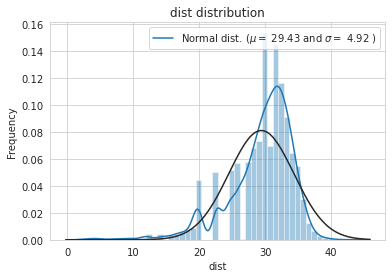

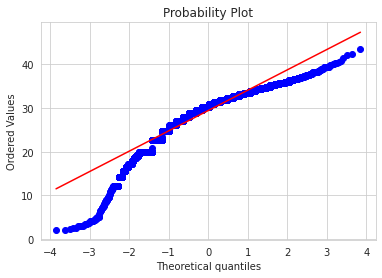

In [ ]:
skewed_feats = ['yeartype', 'dist']
for feat in skewed_feats:
  sns.distplot(train[feat], fit=norm)

  # Get the fitted parameters used by the function
  (mu, sigma) = norm.fit(train[feat])
  print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

  #Now plot the distribution
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
              loc='best')
  plt.ylabel('Frequency')
  plt.title(f'{feat} distribution')

  #Get also the QQ-plot
  fig = plt.figure()
  res = stats.probplot(train[feat], plot=plt)
  plt.show()

# 데이터 나누기

In [ ]:
## X_train = train.drop(['price'], axis=1)
## Y_train = train['price']
## X_test = test.copy()
## 
## print(X_train.shape)
## print(Y_train.shape)
## print(X_test.shape)

# Model

In [ ]:
from pycaret.regression import *
clf = setup(data=train, target='price')

,Description,Value
0,session_id,3018
1,Target,price
2,Original Data,"(11764, 27)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,22
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8234, 24)"


In [ ]:
best_3 = compare_models(sort='RMSE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.2858,0.2833,0.5260,0.6385,0.1006,0.0696,0.060
catboost,CatBoost Regressor,0.2852,0.2890,0.5316,0.6309,0.1013,0.0696,2.095
gbr,Gradient Boosting Regressor,0.3097,0.3033,0.5450,0.6127,0.1022,0.0730,0.279
xgboost,Extreme Gradient Boosting,0.2929,0.3138,0.5552,0.5973,0.1040,0.0707,0.635
rf,Random Forest Regressor,0.3066,0.3381,0.5760,0.5661,0.1063,0.0726,0.977
knn,K Neighbors Regressor,0.3261,0.3435,0.5823,0.5594,0.1059,0.0757,0.046
lr,Linear Regression,0.3560,0.3518,0.5886,0.5494,0.1061,0.0795,0.248
br,Bayesian Ridge,0.3566,0.3518,0.5886,0.5493,0.1061,0.0796,0.014
ridge,Ridge Regression,0.3854,0.3734,0.6072,0.5212,0.1077,0.0840,0.012
et,Extra Trees Regressor,0.3173,0.3831,0.6135,0.5068,0.1163,0.0744,0.834


# Prediction

In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
submission = pd.DataFrame({
    "no": test_no,
    "가격(만원)": ensemble
})
submission.to_csv('/content/drive/My Drive/dg_univ_2020_ml/output/v1.2.3.6.csv', index=False)